# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [6]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [22]:
charges = medical['charges']

mean_charges = np.mean(charges)
std_dev_charges = np.std(charges, ddof = 1)

print(f"Mean of Charges: {mean_charges:.2f}")
print(f"Standard Deviation of Charges: {std_dev_charges:.2f}")

Mean of Charges: 13270.42
Standard Deviation of Charges: 12110.01


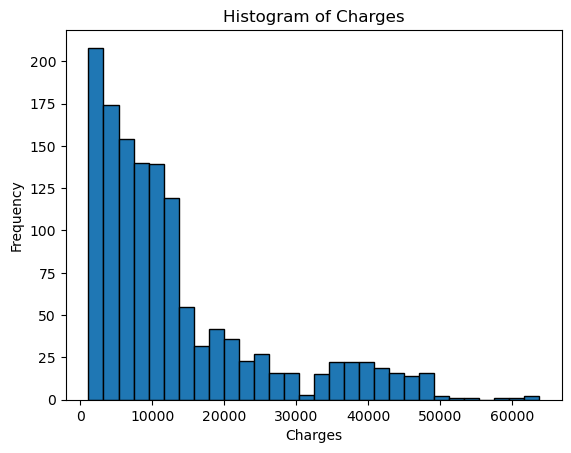

In [23]:
plt.hist(charges, bins=30, edgecolor='black')
plt.title('Histogram of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 

Appropriate Frequentist Test:
The most appropriate frequentist test in this scenario would be to compare the sample mean to a known value (in this case, 12,000) to determine if the sample mean is significantly different from this value.

•  Null Hypothesis (H0): The average charge is 12,000 or higher.
                         H0:μ≥12000
                         
•  Alternative Hypothesis (Ha): The average charge is less than 12,000.
                         Ha:μ<12000
                         
•  Test Statistic: Calculate the t-statistic.

P-Value: Compare the calculated t-statistic to the critical value from the t-distribution or calculate the p-value to determine if it's statistically significant (typically at a 0.05 significance level).

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [28]:
# Sample size
n = len(charges)

# Calculate the t critical value for a one-sided 95% confidence interval
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha, df=n-1)

# Calculate the margin of error
margin_of_error = t_critical * (std_dev_charges / np.sqrt(n))

# One-sided confidence interval (lower bound)
lower_bound = mean_charges - margin_of_error

print(f"Sample mean: {mean_charges:.2f}")
print(f"Standard deviation: {std_dev_charges:.2f}")
print(f"Margin of error: {margin_of_error:.2f}")
print(f"One-sided 95% confidence interval lower bound: {lower_bound:.2f}")

Sample mean: 13270.42
Standard deviation: 12110.01
Margin of error: 544.94
One-sided 95% confidence interval lower bound: 12725.49


The lower bound of the one-sided 95% confidence interval is 12,725.49, which is above the critical threshold of 12,000. This indicates that even at the lower bound of the confidence interval, the average charge is higher than $12,000.

Given these results, the administrator should not be concerned. The confidence interval suggests that the true average charge is likely still above $12,000, which supports the hospital's operational model.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Null Hypothesis (H₀): There is no difference in the mean charges between people with insurance and those without. 
                             
                             That is, μ(insured)=μ(uninsured)

Alternative Hypothesis (H₁): There is a difference in the mean charges between people with insurance and those without. 
                             
                             That is, μ(insured)≠μ(uninsured)

Assumption
 
The t-test for the difference between means with the pooled standard deviation assumes that the variances of the two groups (insured and uninsured) are equal. This is known as the assumption of homogeneity of variances. If this assumption does not hold, the results of the t-test may not be valid.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [31]:
# Separate the data into insured and uninsured groups
insured = medical.query('insuranceclaim == 1')
uninsured = medical.query('insuranceclaim == 0')

# Sample sizes
n1 = len(insured)
n0 = len(uninsured)

# Sample means
x1 = np.mean(insured['charges'])
x0 = np.mean(uninsured['charges'])

# Sample standard deviations
s1 = np.std(insured['charges'], ddof=1)
s0 = np.std(uninsured['charges'], ddof=1)

# Print the results in a table format
print(f"{'Metric':<25}{'Insured':<15}{'Uninsured':<15}")
print(f"{'-'*55}")
print(f"{'Number of individuals':<25}{n1:<15}{n0:<15}")
print(f"{'Mean charges':<25}{x1:<15.2f}{x0:<15.2f}")
print(f"{'Standard deviation':<25}{s1:<15.2f}{s0:<15.2f}")

Metric                   Insured        Uninsured      
-------------------------------------------------------
Number of individuals    783            555            
Mean charges             16423.93       8821.42        
Standard deviation       14045.93       6446.51        


In [38]:
# Calculate pooled standard deviation
sp = np.sqrt(((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / (n0 + n1 - 2))

# Calculate t-statistic
t_statistic = (x0 - x1) / (sp * np.sqrt(1/n0 + 1/n1))

# Degrees of freedom
df = n0 + n1 - 2


# Print the results
print(f"Pooled standard deviation (sp): {sp:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"Degrees of freedom: {df}")

Pooled standard deviation (sp): 11520.0343
T-statistic: -11.8933
Degrees of freedom: 1336


•  A t-value of −11.8933 is extremely far in the tail of the distribution, indicating a very small p-value.

•  For t≈−11.89 and large degrees of freedom, the p-value will be close to 0.

Given that ∣t∣=11.8933 is significantly larger than common critical values (e.g., 2.576 for p=0.01with large df), the p-value will be much less than 0.01.

The p-value is effectively close to 0.

In practical terms, this result indicates strong evidence against the null hypothesis, meaning there is a significant difference in charges between insured and uninsured individuals.

In [37]:
# Calculate p-value from t-distribution
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print(f"P-value: {p_value:.4f}")

P-value: 0.0000


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There, we will not find a direct function labeled as a z-test.

•	The z-test is typically used when the sample size is large (usually n>30n>30) or when the population standard deviation is known.

•	It assumes the data follows a normal distribution and uses the standard normal distribution to compute the test statistic.

•	In practice, the t-test is preferred when the sample size is small, or the population standard deviation is unknown.

•	As the sample size increases, the t-distribution approaches the normal distribution, making the t-test effectively the same as the z-test for large samples.

•	In scipy, for large samples where the t-distribution approximates the normal distribution, the t-test results can serve as a z-test approximation.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test